## Problem Statement

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y = Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## 1 - Installing and Importing the necessary libraries

This task is a classification problem, where we will build and evaluate various machine learning models to predict visa approval status.

**Instruction**:
Restart the runtime after installing libraries to ensure correct package versions and ignore dependency warnings.

In [1]:
!pip install pandas==2.2.2 numpy==2.0.2 matplotlib==3.10.0 seaborn==0.13.2 scikit-learn==1.6.1 xgboost==2.1.4 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 2.1 MB/s eta 0:00:00


In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# Library to split data
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To help with the model building
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
# For ensemble models
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)

# For hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

## 2 - Import Dataset

In [2]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
visa = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project-3/EasyVisa.csv')

In [4]:
# Make a copy of data and preserve the original
data = visa.copy()

## 3 - Data Overview

#### 3.1 - View sample rows of the dataset

In [5]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [6]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [7]:
data.sample(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
17154,EZYV17155,Europe,Bachelor's,N,N,16646,2003,Northeast,78754.2700,Year,Y,Certified
6992,EZYV6993,Asia,Bachelor's,N,N,3347,2007,Northeast,104484.7500,Year,Y,Certified
5006,EZYV5007,Asia,Bachelor's,N,N,2032,2004,Northeast,468.4512,Hour,Y,Denied
9159,EZYV9160,Asia,Master's,Y,Y,1862,1997,West,130456.7700,Year,Y,Certified
21712,EZYV21713,Asia,Master's,N,N,2016,2007,West,146849.8200,Year,Y,Denied


#### 3.2 - Shape of the dataset

In [8]:
data.shape

(25480, 12)

<span style="color: blue;"> **Observation**</span>
* The dataset has 25480 rows and 12 columns

#### 3.3 Check the column data types and describe the dataset

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


<span style="color: blue;">**Observations**</span>
* **Missing Values**: There are no missing values in any of the columns, as indicated by the `Non-Null Count` being equal to the total number of entries (25480) for all columns.
* **Data Types**: The dataset contains numerical columns (`no_of_employees`, `yr_of_estab`, and `prevailing_wage`) and rest are object type columns. The object type columns are potential candidates for conversion to categorical data types for further analysis and modeling.
* **Anomalies in `no_of_employees`**: The minimum value of -26 in `no_of_employees` is an anomaly and requires preprocessing.
* **Distribution of `no_of_employees`**: The large difference between the 75th percentile and the maximum value, along with the mean being larger than the median, suggests that `no_of_employees` is right-skewed and contains potential outliers.
* **Anomalies in `yr_of_estab`**: The minimum value of 1800 for `yr_of_estab` seems unusually low and might indicate data entry errors or require further investigation.
* **Distribution of `yr_of_estab`**: The data for `yr_of_estab` appears to be left-skewed, as suggested by the relatively large difference between the minimum and the 25th percentile compared to the difference between the median and the maximum.
* **`prevailing_wage` Range**: The wide range of values in `prevailing_wage` is expected due to the different units of wage (`unit_of_wage`).


#### 3.4 - Convert columns with 'object' type to 'category' type

In [11]:
for column in data.columns:
    if data[column].dtype == 'object':
      data[column] = pd.Categorical(data[column])

In [12]:
data.describe(include='category').T

,count,unique,top,freq
case_id,25480,25480,EZYV9999,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


<span style="color: blue;">**Observation**</span>

* **case_id**: The `case_id` column contains 25480 unique values, which is equal to the total number of entries. This indicates that `case_id` is a unique identifier for each visa application and does not provide any meaningful information for predicting the `case_status`. Therefore, this column can be excluded from the analysis.
* **case_status**: The `case_status` column shows a significant imbalance, with 'Certified' being the majority class (17018 occurrences) compared to the 'Denied' class. This class imbalance needs to be addressed during model building to prevent the model from being biased towards the majority class.
* To gain further insights into the distribution of categorical features, we will examine the frequency counts of each unique value in the remaining categorical columns.


In [13]:
# Drop case_id column
data.drop("case_id", axis=1, inplace=True)

In [14]:
# Print unique values and its count in each column
for column in data.columns:
  if data[column].dtype == 'category':
    print("-" * 20, column, "-" * 20)
    print(data[column].value_counts())
    print("-" * 50)

-------------------- continent --------------------
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
--------------------------------------------------
-------------------- education_of_employee --------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
--------------------------------------------------
-------------------- has_job_experience --------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
--------------------------------------------------
-------------------- requires_job_training --------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
--------------------------------------------------
-------------------- region_of_employment --------------------
region_of_employment
Northeast    7195
South     

#### 3.5 - Check for duplicate values and missing values

In [17]:
# Checking for duplicate values
data.duplicated().sum()

np.int64(0)

In [18]:
# Checking for missing values
data.isnull().sum()

,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0
full_time_position,0


<span style="color: blue;">**Observation**</span>

* There are no duplicate entries in the dataset.
* No missing values are present in any of the columns, which means imputation is not required.


#### 3.6 - Fix negative values in no_of_employees column

In [19]:
# Count the number of records where 'no_of_employees' is negative
data.loc[data["no_of_employees"] < 0].shape

(33, 11)

In [20]:
# Convert the negative values into absolute numbers
data["no_of_employees"] = data["no_of_employees"].abs()

## 4 - Exploratory Data Analysis (EDA)

### 4.1 - Define utility functions for Univariate Analysis

In [21]:
# Function to plot histogram and box plot
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    # creating the 2 subplots
    # boxplot will be created and a triangle will indicate the mean value of the column
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="turquoise"
    )

    # For histogram
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )
    # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--", label = 'Mean'
    )
    # Add median to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="orange", linestyle="-", label = 'Median'
    )
    ax_hist2.legend() # Add legend to the histogram

In [22]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### 4.2 - Univariate Analysis

#### 4.2.1 - Observation on continent

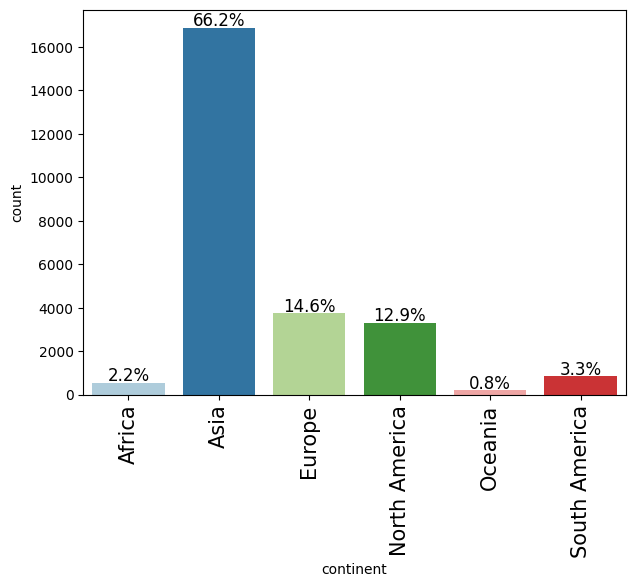

In [23]:
labeled_barplot(data, "continent", perc=True)

<span style="color: blue;">**Observation**</span>

* The applicants from Asia is the largest proportion in the dataset. This imbalance may need to be considered during model training, potentially through techniques like stratified sampling, to ensure the model does not overfit to the majority class or underperform on minority continents


#### 4.2.2 - Observation on education_of_employee

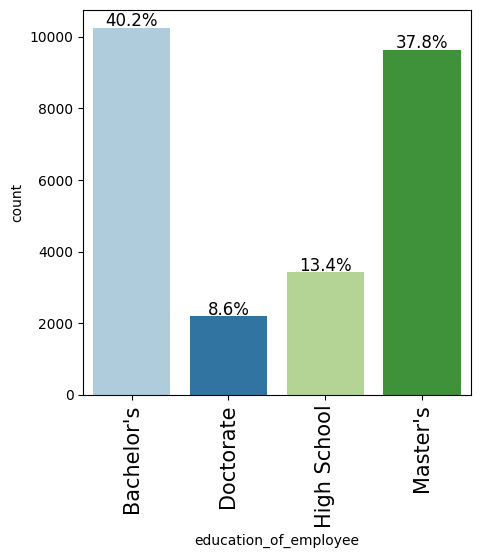

In [24]:
labeled_barplot(data, "education_of_employee", perc=True)

<span style="color: blue;">**Observation**</span>

The dataset exhibits a higher frequency of applicants holding Bachelor's and Master's degrees compared to High School diplomas or Doctorates.

#### 4.2.3 - Observation on has_job_experience

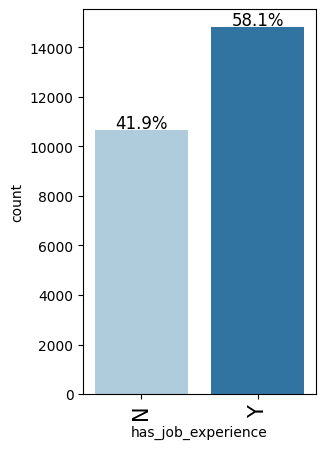

In [25]:
labeled_barplot(data, 'has_job_experience', perc=True)

<span style="color: blue;">**Observation**</span>

* More applicants have job experience.

#### 4.2.4 - Observation on requires_job_training

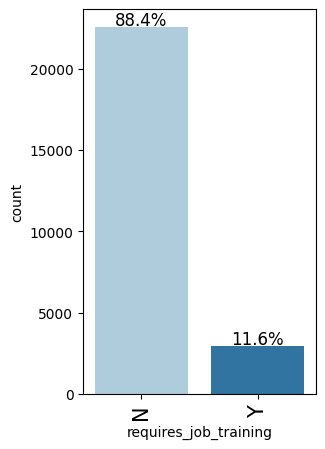

In [26]:
labeled_barplot(data, 'requires_job_training', perc=True)

<span style="color: blue;">**Observation**</span>

* More applicants do not require any job training.

#### 4.2.5 - Observation on no_of_employees

In [27]:
data["no_of_employees"].describe()

,no_of_employees
count,25480.000000
mean,5667.089207
std,22877.917453
min,11.000000
25%,1022.000000
50%,2109.000000
75%,3504.000000
max,602069.000000


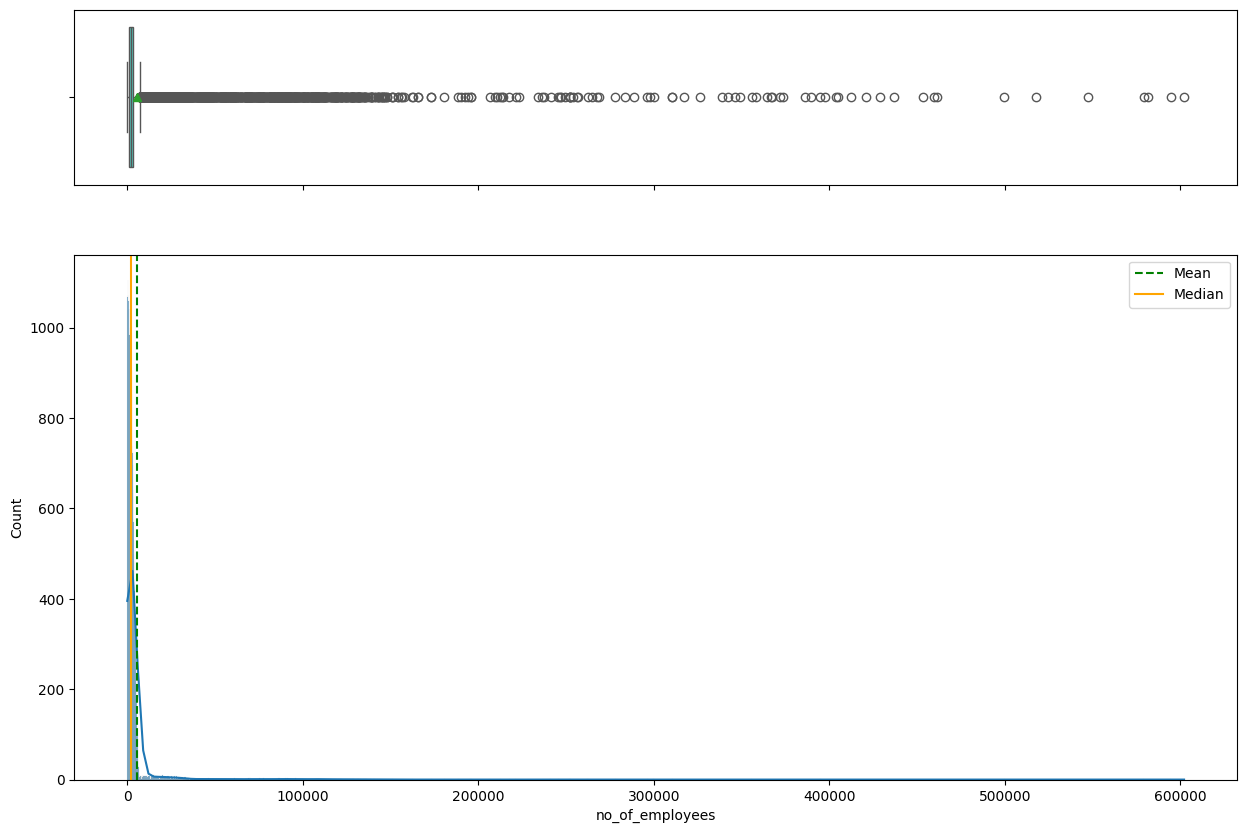

In [29]:
histogram_boxplot(data, "no_of_employees", kde=True, bins=None)

<span style="color: blue;">**Observation**</span>

* As previously observed, the no_of_employees distribution is heavily skewed to the right. Due to this skewness and the presence of outliers, direct inference from the histogram and boxplot is limited.

#### 4.2.6 - Observation on yr_of_estab

In [30]:
data["yr_of_estab"].describe()

,yr_of_estab
count,25480.000000
mean,1979.409929
std,42.366929
min,1800.000000
25%,1976.000000
50%,1997.000000
75%,2005.000000
max,2016.000000


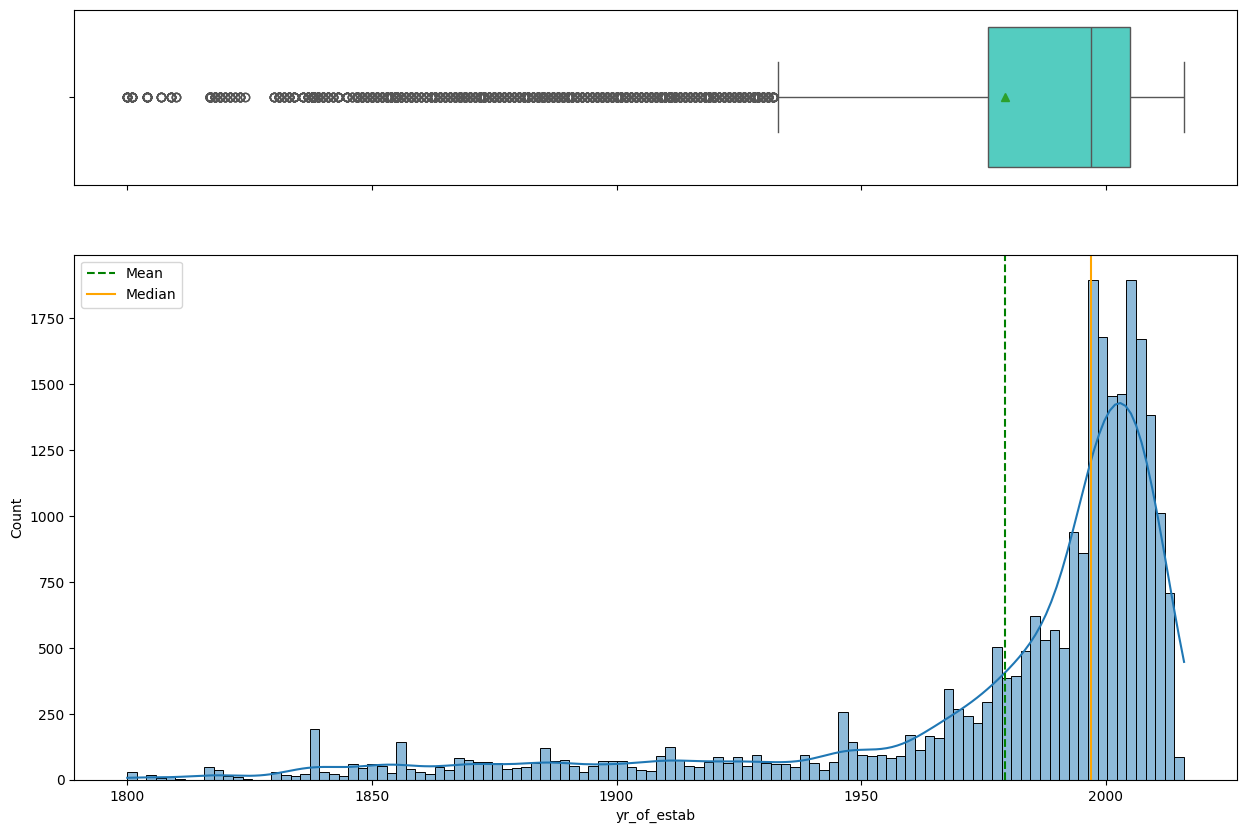

In [31]:
histogram_boxplot(data, "yr_of_estab", kde=True, bins=None)

<span style="color: blue;">**Observation**</span>

* As previously observed, the yr_of_estab distribution is heavily left-skewed and contains outliers, suggesting that older establishments are less frequent in the dataset.

#### 4.2.7 - Observation on region_of_employment

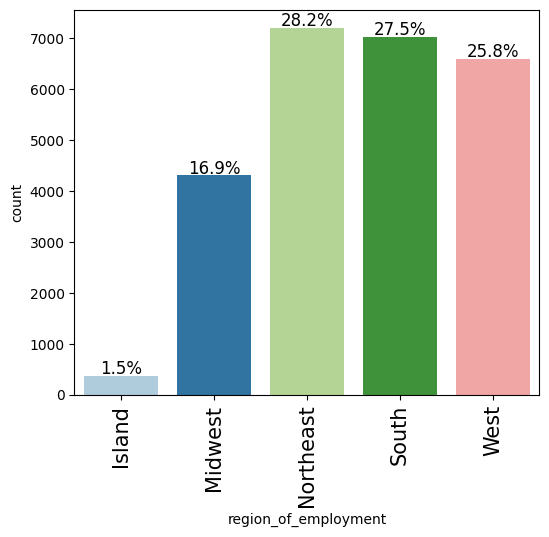

In [32]:
labeled_barplot(data, 'region_of_employment', perc=True)

<span style="color: blue;">**Observation**</span>

* The majority of foreign workers are employed in the Northeast, South, and West regions of the United States.
* The Midwest region has a lower number of foreign worker placements compared to the Northeast, South, and West.
* The Island region shows a significantly lower number of foreign worker placements compared to all other regions.

#### 4.2.8 - Observation on prevailing_wage

In [34]:
data['prevailing_wage'].describe()

,prevailing_wage
count,25480.000000
mean,74455.814592
std,52815.942327
min,2.136700
25%,34015.480000
50%,70308.210000
75%,107735.512500
max,319210.270000


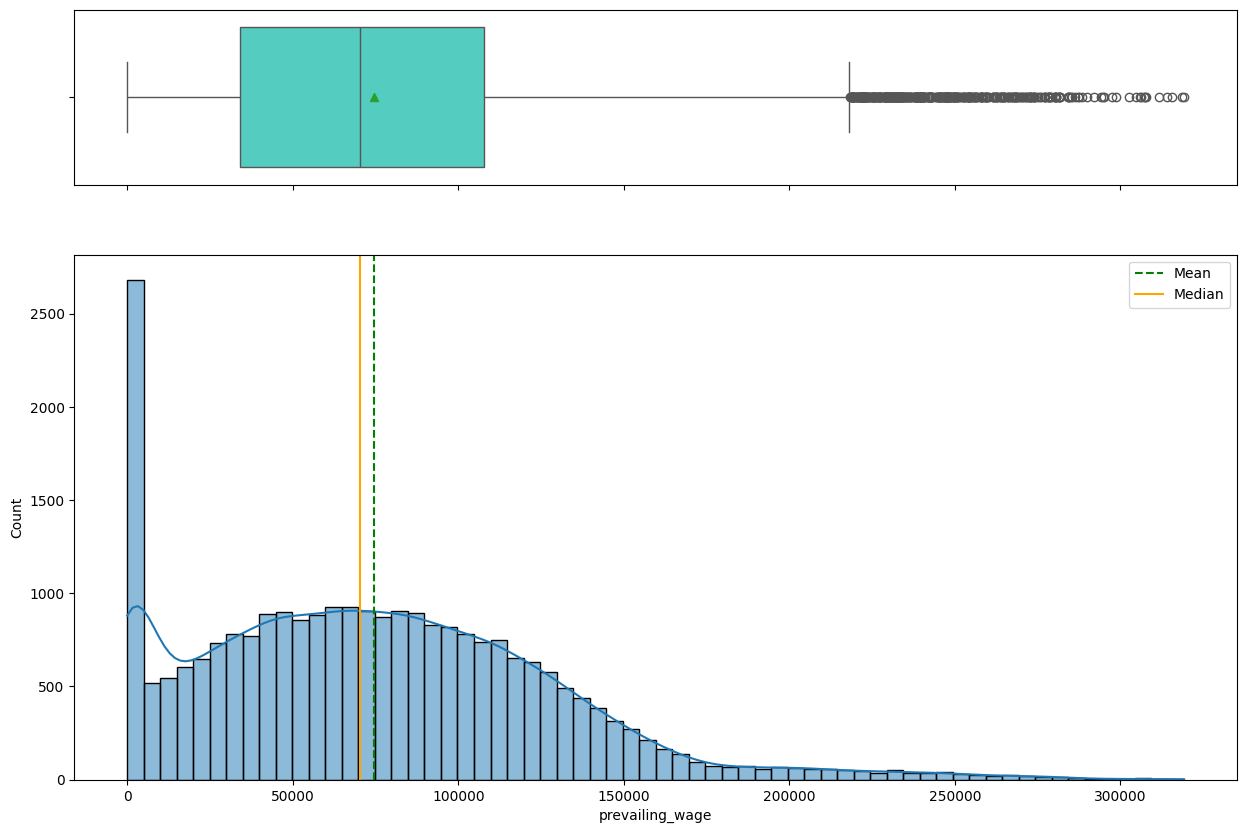

In [35]:
histogram_boxplot(data, "prevailing_wage", kde=True, bins=None)

<span style="color: blue;">**Observation**</span>

* As observed earlier, range of values in prevailing_wage is large. The wide range is expected due to the different units of wage (unit_of_wage).
* We'll not normalize the prevailing_wage column into any common unit, since we do not know the exact number of working hours for each unit_of_wage. This is useful to derive insights between the unit_of _wage and case_status columns.

#### 4.2.9 - Observation on unit_of_wage

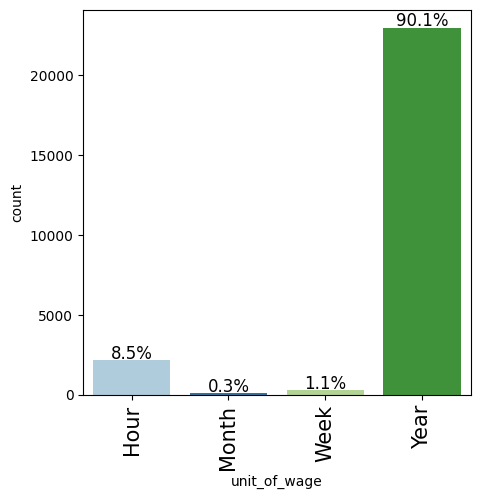

In [36]:
labeled_barplot(data, 'unit_of_wage', perc=True)

<span style="color: blue;">**Observation**</span>

*  The vast majority (90%) of entries in the dataset indicate the `unit_of_wage` as 'Yearly'.

#### 4.2.10 - Observation on full_time_position

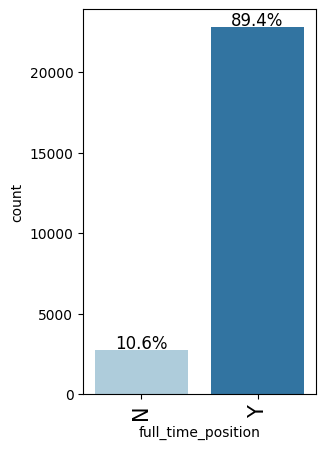

In [37]:
labeled_barplot(data, 'full_time_position', perc=True)

<span style="color: blue;">**Observation**</span>

*  89.4% of applications are for full time positions.

#### 4.2.11 - Observations on case status

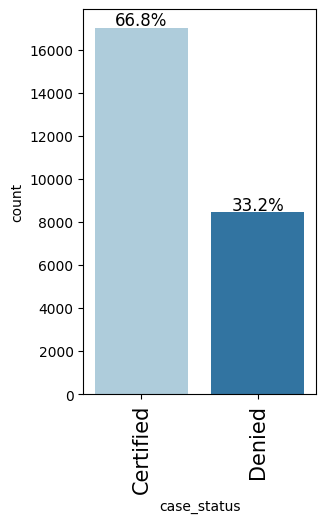

In [38]:
labeled_barplot(data, 'case_status', perc=True)

<span style="color: blue;">**Observation**</span>

*  66.8% of outcome on applications is visa certified showing imbalance in the data to watch out while modeling.

### 4.2 - Define utility functions for Bivariate analysis

In [ ]:
### function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### 4.3 - Bivariate Analysis

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list]._____, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
) ## Complete the code to find the correlation between the variables
plt.show()

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

In [ ]:
stacked_barplot(data, "education_of_employee", "case_status")

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

In [ ]:
stacked_barplot('_____') ## Complete the code to plot stacked barplot for region of continent and case status

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

In [ ]:
stacked_barplot('_____') ## Complete the code to plot stacked barplot for region of case_status and has_job_experience

#### Checking if the prevailing wage is similar across all the regions of the US

In [ ]:
plt.figure(figsize=(10, 5))
sns.'_______' ## Complete the code to create boxplot for region of employment and prevailing wage
plt.show()

#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

In [ ]:
distribution_plot_wrt_target('_______') ## Complete the code to find distribution of prevailing wage and case status

#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

In [ ]:
stacked_barplot('_______') ## Complete the code to plot stacked barplot for unit of wage and case status

## Data Pre-processing

### Outlier Check

- Let's check for outliers in the data.

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Data Preparation for modeling

- We want to predict which visa will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [ ]:
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

X = data._______ ## Complete the code to drop case status from the data
y = data["case_status"]


X = pd._______  ## Complete the code to create dummies for X

# Complete the code to split the dataset into train and valid with a ratio of 7:3
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=______, random_state=1, stratify=y
)

# # Complete the code to split the dataset into valid and test with a ratio of 9:1
X_val,X_test,y_val,y_test = train_test_split(
    X_val,y_val,test_size=_____,random_state=1,stratify=y_val
)


In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of Validation set : ", X_val.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

## Model Building

### Model Evaluation Criterion

Provide some reasoning for choosing the metric here : ______

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Defining scorer to be used for cross-validation and hyperparameter tuning

In [ ]:
scorer = metrics.make_scorer(metrics._____) ## Complete the code to define the metric

## Possible metrics are [recall_score,f1_score,accuracy_score,precision_score]
## For example, metrics.precision_score

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building with original data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest",'_____')) ## Complete the code to add Random Forest Classifier with random_state of 1.
models.append(("GBM", '_____')) ## Complete the code to add Gradient Boosting Classifier with random_state of 1.
models.append(("Adaboost", '_____')) ## Complete the code to add AdaBoost Classifier with random_state of 1.
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", '_____')) ## Complete the code to add Decision Tree Classifier with random_state of 1.

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=_____, shuffle=True, random_state=1
    )  # Complete the code to set the number of splits.
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring = scorer,cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(_____,_____) ## Complete the code to fit the model on X_train and y_train
    scores = _____(y_val, model.predict(X_val)) ## Complete the code to define the metric function name.
    print("{}: {}".format(name, scores))

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Model Building with oversampled data

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=_____, k_neighbors=_____, random_state=1) ## Complete the code to set the k-nearest neighbors and sampling strategy
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest",'_____')) ## Complete the code to add Random Forest Classifier with random_state of 1.
models.append(("GBM", '_____')) ## Complete the code to add Gradient Boosting Classifier with random_state of 1.
models.append(("Adaboost", '_____')) ## Complete the code to add AdaBoost Classifier with random_state of 1.
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", '_____')) ## Complete the code to add Decision Tree Classifier with random_state of 1.

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=_____, shuffle=True, random_state=1
    )  ## Complete the code to set the number of splits
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over,scoring = scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(_____,_____) ## Complete the code to fit the model on the oversampled data.
    scores = _____(y_val, model.predict(X_val)) ## Complete the code to define the metric function name.
    print("{}: {}".format(name, scores))

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Model Building with undersampled data

In [ ]:
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest",'_____')) ## Complete the code to add Random Forest Classifier with random_state of 1.
models.append(("GBM", '_____')) ## Complete the code to add Gradient Boosting Classifier with random_state of 1.
models.append(("Adaboost", '_____')) ## Complete the code to add AdaBoost Classifier with random_state of 1.
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", '_____')) ## Complete the code to add Decision Tree Classifier with random_state of 1.

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=_____, shuffle=True, random_state=1
    )  ## Complete the code to set the number of splits
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un,scoring = scorer, cv=kfold,n_jobs =-1
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(_____,_____) ## Complete the code to fit the model on the undersampled data.
    scores = _____(y_val, model.predict(X_val)) ## Complete the code to define the metric function name.
    print("{}: {}".format(name, scores))

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

## Hyperparameter Tuning

### Tuning AdaBoost using oversampled data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [_____], ## Complete the code to set the number of estimators
    "learning_rate": [_____], ## Complete the code to set the learning rate.
    "estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=_____, random_state=1)  ## Complete the code to set the cv parameter

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(_____,_____) ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
## Complete the code to set the best parameters.
tuned_ada = AdaBoostClassifier(
    n_estimators= _____, learning_rate= _____, estimator= DecisionTreeClassifier(max_depth=_____, random_state=1)
)

tuned_ada.fit(X_train_over, y_train_over)

In [ ]:
ada_train_perf = model_performance_classification_sklearn(tuned_ada, X_train_over, y_train_over)
ada_train_perf

In [ ]:
## Complete the code to check the model performance for validation data.
ada_val_perf = model_performance_classification_sklearn(tuned_ada,_____,_____)
ada_val_perf

### Tuning Random forest using undersampled data

In [ ]:
%%time

# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [_____], ## Complete the code to set the number of estimators.
    "min_samples_leaf": np.arange(_____,_____), ## Complete the code to set the minimum number of samples in the leaf node.
    "max_features": [np.arange(_____,_____,_____),'sqrt'], ## Complete the code to set the maximum number of features.
    "max_samples": np.arange(_____,_____,_____)} ## Complete the code to set the maximum number of samples.


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=_____, random_state=1) ## Complete the code to set the cv parameter

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(_____,_____) ## Complete the code to fit the model on under sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Complete the code to define the best model
tuned_rf2 = RandomForestClassifier(
    max_features=_____,
    random_state=_____,
    max_samples=_____,
    n_estimators=_____,
    min_samples_leaf=_____,
)

tuned_rf2.fit(X_train_un, y_train_un)

In [ ]:
rf2_train_perf = model_performance_classification_sklearn(
    tuned_rf2, X_train_un, y_train_un
)
rf2_train_perf

In [ ]:
## Complete the code to print the model performance on the validation data.
rf2_val_perf = model_performance_classification_sklearn(tuned_rf2,_____,_____)
rf2_val_perf

### Tuning with Gradient boosting with oversampled data

In [ ]:
%%time

# defining model
Model = GradientBoostingClassifier(random_state=1)

## Complete the code to define the hyper parameters.
param_grid={"n_estimators": np.arange(_____,_____,_____), "learning_rate": [_____], "subsample":[_____,_____], "max_features":[_____,_____]}

## Complete the code to set the cv parameter.
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, scoring=scorer, n_iter=50, n_jobs = -1, cv=_____, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
## Complete the code to define the best model.
tuned_gbm = GradientBoostingClassifier(
    max_features=_____,
    random_state=_____,
    learning_rate=_____,
    n_estimators=_____,
    subsample=_____
)

tuned_gbm.fit(X_train_over, y_train_over)

In [ ]:
gbm_train_perf = model_performance_classification_sklearn(
    tuned_gbm, X_train_over, y_train_over
)
gbm_train_perf

In [ ]:
## Complete the code to print the model performance on the validation data.
gbm_val_perf = model_performance_classification_sklearn(tuned_gbm,_____,_____)
gbm_val_perf

### Tuning XGBoost using oversampled data

In [ ]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

## Complete the code to define the hyperparameters
param_grid={'n_estimators':[_____],'scale_pos_weight':[_____], 'learning_rate':[_____], 'gamma':[_____], 'subsample':[_____]}

## Complete the code to set the cv parameter
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=_____, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
## Complete the code to define the best model
xgb2 = XGBClassifier(
    random_state=1,
    eval_metric=_____,
    subsample=_____,
    scale_pos_weight=_____,
    n_estimators=_____,
    learning_rate=_____,
    gamma=_____,
)

xgb2.fit(X_train_over, y_train_over)

In [ ]:
xgb2_train_perf = model_performance_classification_sklearn(
    xgb2, X_train_over, y_train_over
)
xgb2_train_perf

In [ ]:
## Complete the code to print the model performance on the validation data.
xgb2_val_perf = model_performance_classification_sklearn(xgb2,_____,_____)
xgb2_val_perf

**We have now tuned all the models, let's compare the performance of all tuned models and see which one is the best.**

## Model performance comparison and choosing the final model

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm_train_perf.T,
        xgb2_train_perf.T,
        ada_train_perf.T,
        rf2_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
    "XGBoost tuned with oversampled data",
    "AdaBoost tuned with oversampled data",
    "Random forest tuned with undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

In [ ]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        gbm_val_perf.T,
        xgb2_val_perf.T,
        ada_val_perf.T,
        rf2_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
    "XGBoost tuned with oversampled data",
    "AdaBoost tuned with oversampled data",
    "Random forest tuned with undersampled data",
]
print("Validation performance comparison:")
models_val_comp_df

In [ ]:
## Complete the code to print the model performance on the test data by the best model.
test = model_performance_classification_sklearn(_____, X_test, y_test)
test

In [ ]:
feature_names = X_train.columns
importances = _____.feature_importances_ ## Complete the code to print the feature importances from the best model.
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Actionable Insights and Recommendations

<font size=6 color='blue'>Power Ahead</font>
___